◆参考

自然言語処理100本ノック：https://nlp100.github.io/ja/ch01.html

答え：https://github.com/yamaru12345/nlp100

# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2024-01-24 12:02:29--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2024-01-24 12:02:30 (19.1 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 30 not upgraded.
Need to get 7,367 kB of archives.
After this operation, 59.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab-dev amd64 0.996-14build9 [306 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-ipadic all 2.7.0-20070801+main-3 [6,718 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab amd64 0.996-14build9 [136 kB]
Get:6 http://archive.ubuntu.co

In [3]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [5]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


## 30. 形態素解析結果の読み込み
***
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':
        continue
      else:
        attr =  fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        morphs.append(morph)
    else:  # 文末：形態素リストを文リストに追加
      sentences.append(morphs)
      morphs = []

# 確認
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


    このコードは、MeCabを用いて形態素解析されたテキストファイルからデータを読み取り、文ごとに形態素情報を辞書型に格納しています。
    以下に、具体的な処理を解説します。

    ファイルの読み取り:
    filename = './neko.txt.mecab'：形態素解析済みのテキストファイルのパスを指定しています。
    sentences = []：文ごとの形態素情報を格納するためのリストを初期化します。
    morphs = []：各文の形態素情報を格納するためのリストを初期化します。
    ファイルの各行の解析:
    with open(filename, mode='r') as f:：指定されたファイルを読み取りモードで開きます。
    for line in f:：ファイルから1行ずつ読み取ります。
    if line != 'EOS\n':：行が 'EOS\n' でない場合、形態素解析情報を処理します。
    fields = line.split('\t')：タブ文字で分割して、単語とその他の情報を分けます。
    if len(fields) != 2 or fields[0] == '':：分割された要素が2つでないか、単語が空文字の場合はスキップします。
    else:：それ以外の場合、形態素の辞書を作成して morphs リストに追加します。
    attr = fields[1].split(',')：カンマで分割して、各属性情報を取得します。
    morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}：形態素の辞書を作成します。
    morphs.append(morph)：作成した形態素の辞書を morphs リストに追加します。
    else:：行が 'EOS\n' の場合、文の終わりを示します。そのため、文の形態素情報が morphs リストに格納され、それを sentences リストに追加します。
    確認:

    for morph in sentences[2]: print(morph)：3番目の文（インデックスが2）に含まれる形態素情報を表示します。
    
    このコードは、形態素解析結果を読み取り、文ごとに形態素情報を格納しています。各形態素は辞書型で表現され、surfaceは表層形、baseは基本形、posは品詞、pos1は品詞細分類1を表しています。

## 31. 動詞
***
動詞の表層形をすべて抽出せよ．

In [7]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])  # set型なので重複しない要素のみ保持していく

# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)

動詞の表層形の種類: 3893

---サンプル---
しる
おく
鳴かし
払う
黙っ
飛び出し
つづか
食う
上り
言わ


    このコードは、形態素解析結果から動詞の表層形を抽出し、その種類数といくつかのサンプルを表示するものです。
    以下に、具体的な処理の解説を示します。

    動詞の表層形の抽出:
    ans = set()：動詞の表層形を格納するための集合（set）を初期化します。setを使用することで、重複する表層形が保持されません。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] == '動詞':：形態素の品詞が '動詞' の場合、その表層形を ans に追加します。
    ans.add(morph['surface'])：動詞の表層形を集合に追加します。

    結果の表示:
    print(f'動詞の表層形の種類: {len(ans)}\n')：抽出された動詞の表層形の種類数を表示します。
    print('---サンプル---')：サンプルを表示する前に区切り線を表示します。
    for v in list(ans)[:10]: print(v)：抽出された動詞の表層形のうち、最初の10個を表示します。
    このコードは、形態素解析結果から動詞の表層形を抽出し、その種類数とサンプルを表示しています。setを使うことで、同じ表層形の動詞が複数回出現しても、1回分しか集合に追加されません。

## 32. 動詞の原形
***
動詞の原形をすべて抽出せよ．

In [8]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['base'])

# 確認
print(f'動詞の原形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)

動詞の原形の種類: 2300

---サンプル---
しる
おく
払う
繰る
食う
弾ける
見せびらかす
事足る
のばす
過す


    このコードは、形態素解析結果から動詞の原形（基本形）を抽出し、その種類数といくつかのサンプルを表示しています。
    以下に、具体的な処理の解説を示します。

    動詞の原形の抽出:
    ans = set()：動詞の原形を格納するための集合（set）を初期化します。setを使用することで、重複する原形が保持されません。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] == '動詞':：形態素の品詞が '動詞' の場合、その原形を ans に追加します。
    ans.add(morph['base'])：動詞の原形を集合に追加します。
    
    結果の表示:
    print(f'動詞の原形の種類: {len(ans)}\n')：抽出された動詞の原形の種類数を表示します。
    print('---サンプル---')：サンプルを表示する前に区切り線を表示します。
    for v in list(ans)[:10]: print(v)：抽出された動詞の原形のうち、最初の10個を表示します。

    このコードは、形態素解析結果から動詞の原形を抽出し、その種類数とサンプルを表示しています。
    同じ原形の動詞が複数回出現しても、1回分しか集合に追加されません。

## 33. 「AのB」
***
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
介の後ろ
女の品行
人の気
小鼻の左右
木綿の紋付
罪人の首
人の利害
かくの如く
智慧の発達
署の管轄


    このコードは、形態素解析結果から「名詞+の+名詞」の形を抽出し、その種類数といくつかのサンプルを表示しています。
    以下に、具体的な処理の解説を示します。

    「名詞+の+名詞」の抽出:
    ans = set()：「名詞+の+名詞」の形を格納するための集合（set）を初期化します。setを使用することで、同じ形が複数回出現しても、1回分しか集合に追加されません。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for i in range(1, len(sentence) - 1):：文内の各形態素に対して、1番目から最後から2番目までの範囲で以下の処理を行います。
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':：形態素の前が名詞、現在の形態素が「の」で、次の形態素が名詞の場合、それらを結合して ans に追加します。
    ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])：「名詞+の+名詞」の形を集合に追加します。

    結果の表示:
    print(f'「名詞+の+名詞」の種類: {len(ans)}\n')：抽出された「名詞+の+名詞」の形の種類数を表示します。
    print('---サンプル---')：サンプルを表示する前に区切り線を表示します。
    for n in list(ans)[:10]: print(n)：抽出された「名詞+の+名詞」の形のうち、最初の10個を表示します。

    このコードは、形態素解析結果から「名詞+の+名詞」の形を抽出し、その種類数とサンプルを表示しています。
    同じ形が複数回出現しても、1回分しか集合に追加されません。

## 34. 名詞の連接
***
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [10]:
ans = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for morph in sentence:
    if morph['pos'] == '名詞':  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = ''.join([nouns, morph['surface']])
      num += 1
    elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
      ans.add(nouns)
      nouns = ''
      num = 0
    else:  # それ以外の場合、nounsとnumを初期化
      nouns = ''
      num = 0

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 4454

---サンプル---
天地間
一波瀾
美貌家
水島君
——義理
通り主人
モンセン
地蔵さん
天地開闢以来吾輩
豪奢風流


    このコードは、形態素解析結果から「連接した名詞」の形を抽出し、その種類数といくつかのサンプルを表示しています。
    以下に、具体的な処理の解説を示します。

    連接した名詞の抽出:
    ans = set()：「連接した名詞」の形を格納するための集合（set）を初期化します。
    setを使用することで、同じ形が複数回出現しても、1回分しか集合に追加されません。
    for sentence in sentences:：各文に対して以下の処理を行います。
    nouns = ''：「連接した名詞」を表現する文字列を初期化します。
    num = 0：「連接した名詞」の連結数を表す変数を初期化します。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] == '名詞':：形態素が名詞の場合、それを nouns に連結し、num をインクリメントします。
    nouns = ''.join([nouns, morph['surface']])：名詞を nouns に連結します。
    num += 1：連結数をインクリメントします。
    elif num >= 2:：名詞以外でかつここまでの連結数が2以上の場合、nouns を ans に追加し、nouns と num を初期化します。
    ans.add(nouns)：「連接した名詞」を集合に追加します。
    nouns = ''：nouns を初期化します。
    num = 0：num を初期化します。
    else:：それ以外の場合、nouns と num を初期化します。
    nouns = ''：nouns を初期化します。
    num = 0：num を初期化します。

    結果の表示:
    print(f'連接名詞の種類: {len(ans)}\n')：抽出された「連接した名詞」の形の種類数を表示します。
    print('---サンプル---')：サンプルを表示する前に区切り線を表示します。
    for n in list(ans)[:10]: print(n)：抽出された「連接した名詞」の形のうち、最初の10個を表示します。

    このコードは、形態素解析結果から「連接した名詞」の形を抽出し、その種類数とサンプルを表示しています。
    同じ形が複数回出現しても、1回分しか集合に追加されません。

## 35. 単語の出現頻度
***
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [11]:
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


    このコードは、形態素解析結果から各単語の出現頻度を計算し、出現頻度の高い順にソートして上位10件を表示するものです。以下に、具体的な処理の解説を示します。

    単語の出現頻度の計算:
    from collections import defaultdict：defaultdictを使用するためのimport文です。
    ans = defaultdict(int)：defaultdictを使ってデフォルト値が0の辞書 ans を初期化します。これは、単語ごとの出現頻度を記録するための辞書です。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] != '記号':：形態素の品詞が '記号' でない場合、その単語の出現頻度を更新します。
    ans[morph['base']] += 1：単語が既にansに登録されていればその出現頻度をインクリメントし、初めて登場する単語であれば1をセットします。

    出現頻度の高い順にソート:
    ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)：ans の各項目を、出現頻度が高い順にソートします。
    sorted関数のkey引数には、ソートに使う基準を指定しています。この場合、x[1]は出現頻度を示しています。

    結果の表示:
    for w in ans[:10]: print(w)：出現頻度が高い順にソートされた上位10件を表示します。

    このコードは、形態素解析結果から単語の出現頻度を計算し、出現頻度の高い順にソートして上位10件を表示しています。

## 36. 頻度上位10語
***
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [12]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=83df713f02edd3844455815c3c7df1cb614bb4647a639ad6aad94f95a301802a
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


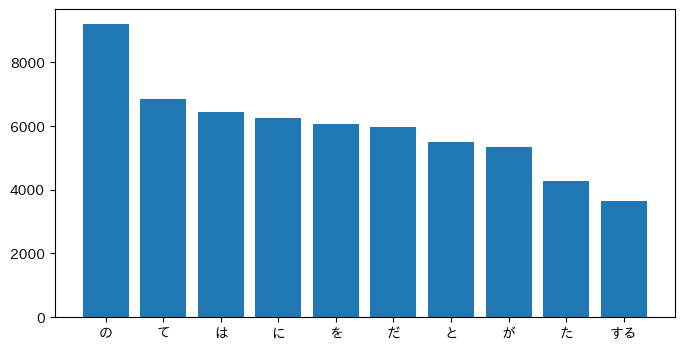

In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

    このコードは、形態素解析結果から各単語の出現頻度を計算し、それをmatplotlibを使用して棒グラフで可視化するものです。
    以下に、具体的な処理の解説を示します。

    単語の出現頻度の計算:
    from collections import defaultdict：defaultdictを使用するためのimport文です。
    ans = defaultdict(int)：defaultdictを使ってデフォルト値が0の辞書 ans を初期化します。これは、単語ごとの出現頻度を記録するための辞書です。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] != '記号':：形態素の品詞が '記号' でない場合、その単語の出現頻度を更新します。
    ans[morph['base']] += 1：単語が既にansに登録されていればその出現頻度をインクリメントし、初めて登場する単語であれば1をセットします。
    出現頻度の高い順にソート:

    ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)：ans の各項目を、出現頻度が高い順にソートします。sorted関数のkey引数には、ソートに使う基準を指定しています。この場合、x[1]は出現頻度を示しています。

    matplotlibを使用した可視化:
    keys = [a[0] for a in ans[0:10]]：出現頻度が高い順にソートされた上位10件の単語を取得します。
    values = [a[1] for a in ans[0:10]]：各単語の出現頻度を取得します。
    plt.figure(figsize=(8, 4))：グラフのサイズを指定します。
    plt.bar(keys, values)：単語を横軸、出現頻度を縦軸として、棒グラフを作成します。
    plt.show()：グラフを表示します。

    日本語の表示対応:
    import japanize_matplotlib：japanize_matplotlibを使用して、matplotlibで日本語を表示できるようにします。
    このコードは、形態素解析結果から単語の出現頻度を計算し、それをmatplotlibを使用して可視化しています。

## 37. 「猫」と共起頻度の高い上位10語
***
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

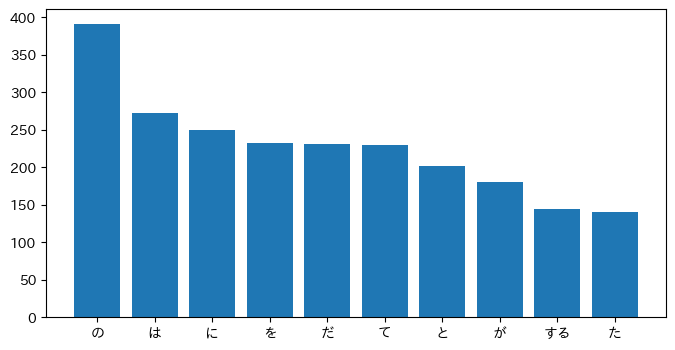

In [14]:
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for morph in sentence:
      if morph['pos'] != '記号':
        ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

    のコードは、形態素解析結果から「猫」という単語が含まれる文に限定して、その文の単語の出現頻度を計算し、matplotlibを使用して可視化するものです。以下に、具体的な処理の解説を示します。

    「猫」を含む文の単語の出現頻度の計算:
    from collections import defaultdict：defaultdictを使用するためのimport文です。
    ans = defaultdict(int)：defaultdictを使ってデフォルト値が0の辞書 ans を初期化します。これは、単語ごとの出現頻度を記録するための辞書です。
    for sentence in sentences:：各文に対して以下の処理を行います。
    if '猫' in [morph['surface'] for morph in sentence]:：文内に「猫」という単語が含まれる場合のみ以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] != '記号':：形態素の品詞が '記号' でない場合、その単語の出現頻度を更新します。
    ans[morph['base']] += 1：単語が既にansに登録されていればその出現頻度をインクリメントし、初めて登場する単語であれば1をセットします。
    del ans['猫']：「猫」の単語自体の出現頻度を削除します。この部分は、「猫」が含まれる文についての処理が終わった後に行います。

    出現頻度の高い順にソート:
    ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)：ans の各項目を、出現頻度が高い順にソートします。sorted関数のkey引数には、ソートに使う基準を指定しています。この場合、x[1]は出現頻度を示しています。

    matplotlibを使用した可視化:
    keys = [a[0] for a in ans[0:10]]：出現頻度が高い順にソートされた上位10件の単語を取得します。
    values = [a[1] for a in ans[0:10]]：各単語の出現頻度を取得します。
    plt.figure(figsize=(8, 4))：グラフのサイズを指定します。
    plt.bar(keys, values)：単語を横軸、出現頻度を縦軸として、棒グラフを作成します。
    plt.show()：グラフを表示します。

    このコードは、「猫」が含まれる文に限定して単語の出現頻度を計算し、それをmatplotlibを使用して可視化しています。

## 38. ヒストグラム
***
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

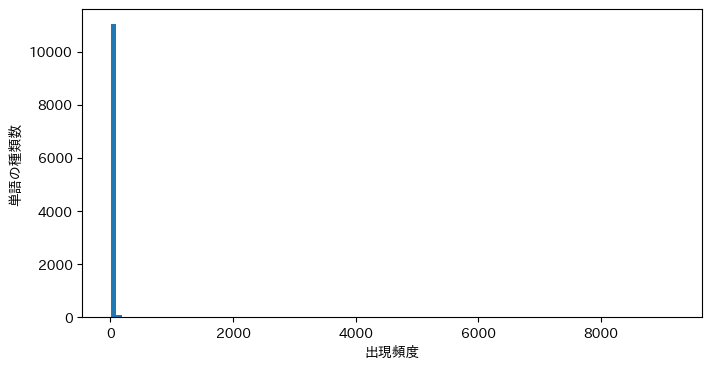

In [15]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

    このコードは、形態素解析結果から各単語の出現頻度を計算し、その出現頻度をヒストグラムで可視化しています。以下に、具体的な処理の解説を示します。

    単語の出現頻度の計算:
    from collections import defaultdict：defaultdictを使用するためのimport文です。
    ans = defaultdict(int)：defaultdictを使ってデフォルト値が0の辞書 ans を初期化します。これは、単語ごとの出現頻度を記録するための辞書です。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] != '記号':：形態素の品詞が '記号' でない場合、その単語の出現頻度を更新します。
    ans[morph['base']] += 1：単語が既にansに登録されていればその出現頻度をインクリメントし、初めて登場する単語であれば1をセットします。
    ans = ans.values()：defaultdictから出現頻度だけを取り出します。

    ヒストグラムの作成と可視化:
    plt.figure(figsize=(8, 4))：グラフのサイズを指定します。
    plt.hist(ans, bins=100)：ヒストグラムを作成します。ansが各単語の出現頻度のリストであり、binsはヒストグラムのビンの数を指定します。
    plt.xlabel('出現頻度')：x軸のラベルを設定します。
    plt.ylabel('単語の種類数')：y軸のラベルを設定します。
    plt.show()：グラフを表示します。

    このコードは、形態素解析結果から各単語の出現頻度を計算し、その出現頻度をヒストグラムで可視化しています。ヒストグラムは、単語の出現頻度ごとにビンに分けられ、それぞれのビン内の単語の種類数を示しています。

## 39. Zipfの法則
***
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

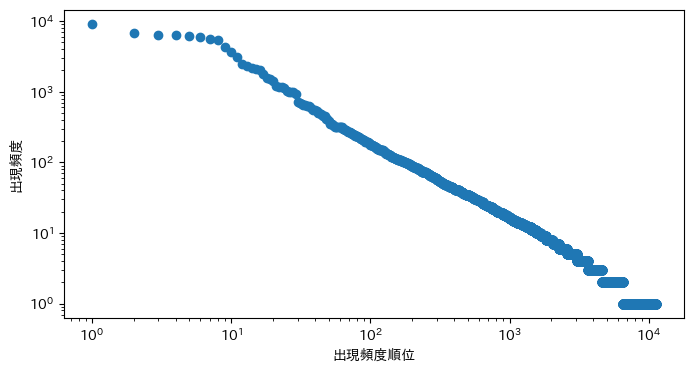

In [16]:
import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()

    このコードは、Zipfの法則を可視化するために、単語の出現頻度順位とその出現頻度を対数スケールで散布図にプロットしています。
    以下に、具体的な処理の解説を示します。

    単語の出現頻度の計算:
    from collections import defaultdict：defaultdictを使用するためのimport文です。
    ans = defaultdict(int)：defaultdictを使ってデフォルト値が0の辞書 ans を初期化します。これは、単語ごとの出現頻度を記録するための辞書です。
    for sentence in sentences:：各文に対して以下の処理を行います。
    for morph in sentence:：文内の各形態素に対して以下の処理を行います。
    if morph['pos'] != '記号':：形態素の品詞が '記号' でない場合、その単語の出現頻度を更新します。
    ans[morph['base']] += 1：単語が既にansに登録されていればその出現頻度をインクリメントし、初めて登場する単語であれば1をセットします。
    ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)：出現頻度が高い順にソートします。

    出現頻度順位と出現頻度の対数スケールでの散布図のプロット:
    ranks = [r + 1 for r in range(len(ans))]：各単語の出現頻度順位を示すリストを作成します。1から始まる順位です。
    values = [a[1] for a in ans]：各単語の出現頻度を示すリストを作成します。
    plt.figure(figsize=(8, 4))：グラフのサイズを指定します。
    plt.scatter(ranks, values)：出現頻度順位と出現頻度の対数スケールでの散布図をプロットします。
    plt.xscale('log')：x軸を対数スケールにします。
    plt.yscale('log')：y軸を対数スケールにします。
    plt.xlabel('出現頻度順位')：x軸のラベルを設定します。
    plt.ylabel('出現頻度')：y軸のラベルを設定します。
    plt.show()：グラフを表示します。

    このコードは、Zipfの法則を確認するために、単語の出現頻度順位とその出現頻度を対数スケールで散布図にプロットしています。
    Zipfの法則に従うと、対数スケールでのプロットは直線になることが期待されます。